In [32]:
import pandas as pd
from google.colab import drive
# Connecting to my google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df_tesla_posts = pd.read_csv('/content/drive/MyDrive/606 project/tesla_posts.csv')
df_tesla_com = pd.read_csv('/content/drive/MyDrive/606 project/tesla_comments.csv')

In [34]:
df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title
0,CSGOSELL,1693526684,166rkkr,t3_166rkkr,0,1,NaN,Highland 3 (OFFICIAL)
1,RobDickinson,1693526736,166rlcn,t3_166rlcn,0,3,NaN,Official new Model 3 Highlander via @FullyChar...
2,FiestaPotato18,1693526817,166rmm4,t3_166rmm4,1,199,NaN,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...
3,BaysideJr,1693526935,166rob9,t3_166rob9,0,1406,NaN,New Tesla Model 3 - what's changed? - CARWOW V...
4,095179005,1693526957,166romb,t3_166romb,0,18,NaN,Tesla opens up non-Tesla superchargers in Cana...


## Tesla posts data cleaning

In [35]:
# Convert UNIX timestamp to normal human readable timestamp
# Filter out rows where 'Created_utc' is None
df_tesla_posts = df_tesla_posts[df_tesla_posts['created_utc'].notna()]

# Convert UNIX timestamp to human-readable format
df_tesla_posts['created_utc'] = pd.to_datetime(df_tesla_posts['created_utc'], unit='s')

df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title
0,CSGOSELL,2023-09-01 00:04:44,166rkkr,t3_166rkkr,0,1,NaN,Highland 3 (OFFICIAL)
1,RobDickinson,2023-09-01 00:05:36,166rlcn,t3_166rlcn,0,3,NaN,Official new Model 3 Highlander via @FullyChar...
2,FiestaPotato18,2023-09-01 00:06:57,166rmm4,t3_166rmm4,1,199,NaN,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...
3,BaysideJr,2023-09-01 00:08:55,166rob9,t3_166rob9,0,1406,NaN,New Tesla Model 3 - what's changed? - CARWOW V...
4,095179005,2023-09-01 00:09:17,166romb,t3_166romb,0,18,NaN,Tesla opens up non-Tesla superchargers in Cana...


In [37]:
df_tesla_posts['selftext']= df_tesla_posts['selftext'].astype(str)
df_tesla_posts['cleaned_selftext'] = df_tesla_posts['selftext'].astype(str).replace(['[removed]', '[deleted]','nan'], '')
df_tesla_posts.head(25)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext
0,CSGOSELL,2023-09-01 00:04:44,166rkkr,t3_166rkkr,0,1,nan,Highland 3 (OFFICIAL),
1,RobDickinson,2023-09-01 00:05:36,166rlcn,t3_166rlcn,0,3,nan,Official new Model 3 Highlander via @FullyChar...,
2,FiestaPotato18,2023-09-01 00:06:57,166rmm4,t3_166rmm4,1,199,nan,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...,
3,BaysideJr,2023-09-01 00:08:55,166rob9,t3_166rob9,0,1406,nan,New Tesla Model 3 - what's changed? - CARWOW V...,
4,095179005,2023-09-01 00:09:17,166romb,t3_166romb,0,18,nan,Tesla opens up non-Tesla superchargers in Cana...,
5,Shadow_SKAR,2023-09-01 00:10:21,166rpjv,t3_166rpjv,1,1,nan,New Tesla Model 3 - what's changed?,
6,whoistheg,2023-09-01 00:20:26,166ry27,t3_166ry27,1,1,[removed],Highland refresh,
7,whoistheg,2023-09-01 00:24:38,166s1o4,t3_166s1o4,0,1,nan,Highland Video,
8,muuuli,2023-09-01 00:26:52,166s3m4,t3_166s3m4,0,1,nan,New Tesla Model 3 - what's changed?,
9,NipponReddit,2023-09-01 00:27:01,166s3qr,t3_166s3qr,0,1,nan,New 2024 Model 3,


In [38]:
df_tesla_posts['title_merged'] = df_tesla_posts['cleaned_selftext'].astype(str) + ' ' + df_tesla_posts['title'].astype(str)
df_tesla_posts.head()

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged
0,CSGOSELL,2023-09-01 00:04:44,166rkkr,t3_166rkkr,0,1,nan,Highland 3 (OFFICIAL),,Highland 3 (OFFICIAL)
1,RobDickinson,2023-09-01 00:05:36,166rlcn,t3_166rlcn,0,3,nan,Official new Model 3 Highlander via @FullyChar...,,Official new Model 3 Highlander via @FullyCha...
2,FiestaPotato18,2023-09-01 00:06:57,166rmm4,t3_166rmm4,1,199,nan,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...,,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert ...
3,BaysideJr,2023-09-01 00:08:55,166rob9,t3_166rob9,0,1406,nan,New Tesla Model 3 - what's changed? - CARWOW V...,,New Tesla Model 3 - what's changed? - CARWOW ...
4,095179005,2023-09-01 00:09:17,166romb,t3_166romb,0,18,nan,Tesla opens up non-Tesla superchargers in Cana...,,Tesla opens up non-Tesla superchargers in Can...


In [39]:
import re
import string
import pandas as pd

def clean_text(text):
    # Check if the value is NaN
    if pd.isna(text):
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove text within brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')

    # Remove additional parentheses
    text = re.sub(r'\(+\)', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove newline characters and extra whitespaces
    text = re.sub(r'\s+', ' ', text.replace('\n', ' ').strip())

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)

    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)

    return text


In [41]:
# Apply the clean_text function to the 'selftext' column
df_tesla_posts['title_cleaned'] = df_tesla_posts['title_merged'].apply(clean_text)
df_tesla_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned
0,CSGOSELL,2023-09-01 00:04:44,166rkkr,t3_166rkkr,0,1,nan,Highland 3 (OFFICIAL),,Highland 3 (OFFICIAL),highland 3 official
1,RobDickinson,2023-09-01 00:05:36,166rlcn,t3_166rlcn,0,3,nan,Official new Model 3 Highlander via @FullyChar...,,Official new Model 3 Highlander via @FullyCha...,official new model 3 highlander via fullycharg...
2,FiestaPotato18,2023-09-01 00:06:57,166rmm4,t3_166rmm4,1,199,nan,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...,,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert ...,highland revealed breaking news robert test dr...
3,BaysideJr,2023-09-01 00:08:55,166rob9,t3_166rob9,0,1406,nan,New Tesla Model 3 - what's changed? - CARWOW V...,,New Tesla Model 3 - what's changed? - CARWOW ...,new tesla model 3 whats changed carwow video w...
4,095179005,2023-09-01 00:09:17,166romb,t3_166romb,0,18,nan,Tesla opens up non-Tesla superchargers in Cana...,,Tesla opens up non-Tesla superchargers in Can...,tesla opens up nontesla superchargers in canad...
5,Shadow_SKAR,2023-09-01 00:10:21,166rpjv,t3_166rpjv,1,1,nan,New Tesla Model 3 - what's changed?,,New Tesla Model 3 - what's changed?,new tesla model 3 whats changed
6,whoistheg,2023-09-01 00:20:26,166ry27,t3_166ry27,1,1,[removed],Highland refresh,,Highland refresh,highland refresh
7,whoistheg,2023-09-01 00:24:38,166s1o4,t3_166s1o4,0,1,nan,Highland Video,,Highland Video,highland video
8,muuuli,2023-09-01 00:26:52,166s3m4,t3_166s3m4,0,1,nan,New Tesla Model 3 - what's changed?,,New Tesla Model 3 - what's changed?,new tesla model 3 whats changed
9,NipponReddit,2023-09-01 00:27:01,166s3qr,t3_166s3qr,0,1,nan,New 2024 Model 3,,New 2024 Model 3,new 2024 model 3


In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and lowercasing
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
df_tesla_posts['fully_cleaned_title'] = df_tesla_posts['title'].apply(preprocess_text)
df_tesla_posts.head(5)

,author,created_utc,id,name,num_comments,score,selftext,title,cleaned_selftext,title_merged,title_cleaned,fully_cleaned_title
0,CSGOSELL,2023-09-01 00:04:44,166rkkr,t3_166rkkr,0,1,nan,Highland 3 (OFFICIAL),,Highland 3 (OFFICIAL),highland 3 official,highland official
1,RobDickinson,2023-09-01 00:05:36,166rlcn,t3_166rlcn,0,3,nan,Official new Model 3 Highlander via @FullyChar...,,Official new Model 3 Highlander via @FullyCha...,official new model 3 highlander via fullycharg...,official new model highlander via fullychargedshw
2,FiestaPotato18,2023-09-01 00:06:57,166rmm4,t3_166rmm4,1,199,nan,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert t...,,HIGHLAND REVEALED -> 🚨 BREAKING NEWS🚨 Robert ...,highland revealed breaking news robert test dr...,highland revealed breaking robert test drive i...
3,BaysideJr,2023-09-01 00:08:55,166rob9,t3_166rob9,0,1406,nan,New Tesla Model 3 - what's changed? - CARWOW V...,,New Tesla Model 3 - what's changed? - CARWOW ...,new tesla model 3 whats changed carwow video w...,new tesla model changed carwow video new model
4,095179005,2023-09-01 00:09:17,166romb,t3_166romb,0,18,nan,Tesla opens up non-Tesla superchargers in Cana...,,Tesla opens up non-Tesla superchargers in Can...,tesla opens up nontesla superchargers in canad...,tesla open supercharger canada location deer r...


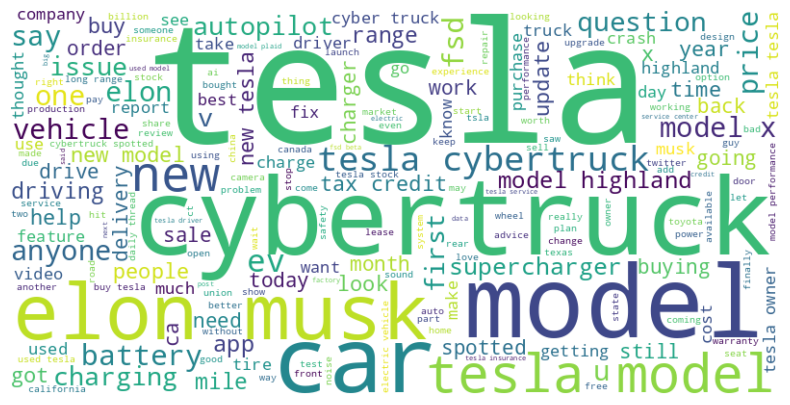

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_tesla_posts['fully_cleaned_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Tesla comments data cleaning

In [48]:
df_tesla_com.head(5)

,_id,author,body,created_utc,id,name,score
0,65de895a8c6899c099ff4491,CommonerChaos,Pretty much lmao,1693526495,jylfrk6,t1_jylfrk6,20
1,65de895a8c6899c099ff4492,NegotiationOk7535,All that rumor for headlight change!!! I think...,1693526532,jylfuol,t1_jylfuol,1
2,65de895a8c6899c099ff4493,elwebst,Kinds like Model S Raven - everyone was obsess...,1693526561,jylfx6o,t1_jylfx6o,14
3,65de895a8c6899c099ff4494,DonQuixBalls,"Also, doesn't really matter the car, they're a...",1693526572,jylfy5p,t1_jylfy5p,2
4,65de895a8c6899c099ff4495,DonQuixBalls,Especially when you consider you can charge th...,1693526678,jylg7oo,t1_jylg7oo,1


In [49]:
# Convert UNIX timestamp to normal human readable timestamp
# Filter out rows where 'Created_utc' is None
df_tesla_com = df_tesla_com[df_tesla_com['created_utc'].notna()]

# Convert UNIX timestamp to human-readable format
df_tesla_com['created_utc'] = pd.to_datetime(df_tesla_com['created_utc'], unit='s')

df_tesla_com.head()

,_id,author,body,created_utc,id,name,score
0,65de895a8c6899c099ff4491,CommonerChaos,Pretty much lmao,2023-09-01 00:01:35,jylfrk6,t1_jylfrk6,20
1,65de895a8c6899c099ff4492,NegotiationOk7535,All that rumor for headlight change!!! I think...,2023-09-01 00:02:12,jylfuol,t1_jylfuol,1
2,65de895a8c6899c099ff4493,elwebst,Kinds like Model S Raven - everyone was obsess...,2023-09-01 00:02:41,jylfx6o,t1_jylfx6o,14
3,65de895a8c6899c099ff4494,DonQuixBalls,"Also, doesn't really matter the car, they're a...",2023-09-01 00:02:52,jylfy5p,t1_jylfy5p,2
4,65de895a8c6899c099ff4495,DonQuixBalls,Especially when you consider you can charge th...,2023-09-01 00:04:38,jylg7oo,t1_jylg7oo,1


In [51]:
# Apply the clean_text function to the 'selftext' column
df_tesla_com['body_cleaned'] = df_tesla_com['body'].apply(clean_text)
df_tesla_com['fully_cleaned_body'] = df_tesla_com['body_cleaned'].apply(preprocess_text)
df_tesla_com.head()

,_id,author,body,created_utc,id,name,score,body_cleaned,fully_cleaned_body
0,65de895a8c6899c099ff4491,CommonerChaos,Pretty much lmao,2023-09-01 00:01:35,jylfrk6,t1_jylfrk6,20,pretty much lmao,pretty much lmao
1,65de895a8c6899c099ff4492,NegotiationOk7535,All that rumor for headlight change!!! I think...,2023-09-01 00:02:12,jylfuol,t1_jylfuol,1,all that rumor for headlight change i think te...,rumor headlight change think tesla look fine r...
2,65de895a8c6899c099ff4493,elwebst,Kinds like Model S Raven - everyone was obsess...,2023-09-01 00:02:41,jylfx6o,t1_jylfx6o,14,kinds like model s raven everyone was obsessed...,kind like model raven everyone obsessed every ...
3,65de895a8c6899c099ff4494,DonQuixBalls,"Also, doesn't really matter the car, they're a...",2023-09-01 00:02:52,jylfy5p,t1_jylfy5p,2,also doesnt really matter the car theyre alway...,also doesnt really matter car theyre always go...
4,65de895a8c6899c099ff4495,DonQuixBalls,Especially when you consider you can charge th...,2023-09-01 00:04:38,jylg7oo,t1_jylg7oo,1,especially when you consider you can charge th...,especially consider charge lfp higher state hi...


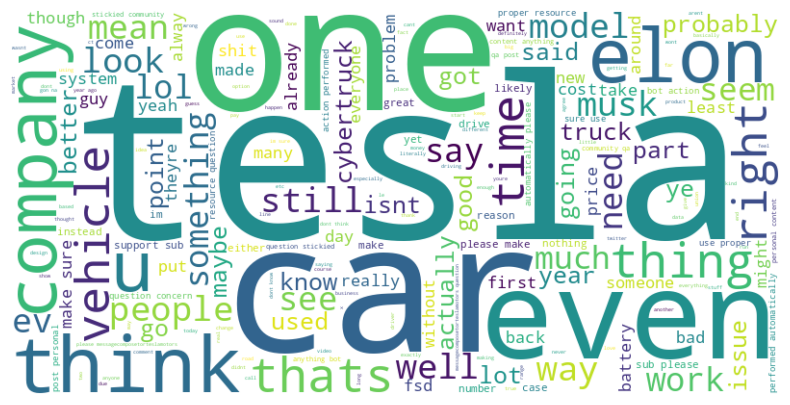

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text = ' '.join(df_tesla_com['fully_cleaned_body'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
df_tesla_posts.rename(columns={'title_cleaned':'text'},inplace=True)
df_tesla_com.rename(columns={'body_cleaned':'text'},inplace=True)

In [54]:
sentiments = pd.concat([df_tesla_posts[['created_utc', 'text']], df_tesla_com[['created_utc', 'text']]], axis=0)

## Sentimental analysis

In [55]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [57]:
# Function to classify sentiment as positive, negative, or neutral
def get_sentiment_label(text):
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    if sentiment_score >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label


In [59]:
# Apply sentiment analysis to each row of 'selftext_cleaned' and 'title_cleaned' columns
sentiments[['score', 'label']] = sentiments.apply(lambda row: pd.Series(get_sentiment_label(row['text'])), axis=1)

In [60]:
sentiments

,created_utc,text,score,label
0,2023-09-01 00:04:44,highland 3 official,0.0000,Neutral
1,2023-09-01 00:05:36,official new model 3 highlander via fullycharg...,0.0000,Neutral
2,2023-09-01 00:06:57,highland revealed breaking news robert test dr...,0.2280,Positive
3,2023-09-01 00:08:55,new tesla model 3 whats changed carwow video w...,0.0000,Neutral
4,2023-09-01 00:09:17,tesla opens up nontesla superchargers in canad...,0.0000,Neutral
...,...,...,...,...
322991,2024-02-13 22:54:12,i didnt i make enough excess solar to pay for ...,-0.1027,Negative
322992,2024-02-13 23:08:13,thank you for sharing the additional details i...,0.7906,Positive
322993,2024-02-13 23:20:15,same right after six months they stopped worki...,0.4588,Positive
322994,2024-02-13 23:56:26,guess i got lucky and they installed powerwall...,0.4215,Positive


In [62]:
sentiments.label.value_counts()

Positive    130910
Neutral     103869
Negative     98443
Name: label, dtype: int64

In [63]:
import datetime
sentiments['date']=sentiments['created_utc'].dt.date
sentiments.head()

,created_utc,text,score,label,date
0,2023-09-01 00:04:44,highland 3 official,0.000,Neutral,2023-09-01
1,2023-09-01 00:05:36,official new model 3 highlander via fullycharg...,0.000,Neutral,2023-09-01
2,2023-09-01 00:06:57,highland revealed breaking news robert test dr...,0.228,Positive,2023-09-01
3,2023-09-01 00:08:55,new tesla model 3 whats changed carwow video w...,0.000,Neutral,2023-09-01
4,2023-09-01 00:09:17,tesla opens up nontesla superchargers in canad...,0.000,Neutral,2023-09-01


In [93]:
# Separate DataFrames for each sentiment type
negative_sentiments = sentiments[sentiments['label'] == 'Negative']
positive_sentiments = sentiments[sentiments['label'] == 'Positive']
neutral_sentiments = sentiments[sentiments['label'] == 'Neutral']

# Calculate mean score and count for each sentiment type for every day
df_negative = negative_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_negative','score': 'mean_negative'})
df_positive = positive_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_positive','score': 'mean_positive'})
df_neutral = neutral_sentiments.groupby(["date"]).agg({'score': 'mean', 'label': 'count'}).reset_index().rename(columns={'label': 'count_neutral','score': 'mean_neutral'})

# Merge the DataFrames
df_tesla = pd.merge(df_negative, df_positive, on="date", how="outer")
df_tesla = pd.merge(df_tesla, df_neutral, on="date", how="outer")

# Compute overall mean score of the day
df_tesla['overall_mean_score'] = (df_tesla['mean_negative'] * df_tesla['count_negative'] + df_tesla['mean_positive'] * df_tesla['count_positive'] + df_tesla['mean_neutral'] * df_tesla['count_neutral']) / (df_tesla['count_negative'] + df_tesla['count_positive'] + df_tesla['count_neutral'])

# Fill NaN values with 0
df_tesla.fillna(0, inplace=True)

# Display the DataFrame
print(df_tesla.head())


         date  mean_negative  count_negative  mean_positive  count_positive  \
0  2023-09-01      -0.445108            1048       0.511260            1675   
1  2023-09-02      -0.459627            1580       0.465160            2075   
2  2023-09-03      -0.469097            1130       0.499003            1320   
3  2023-09-04      -0.457942             532       0.497515             745   
4  2023-09-05      -0.464884             490       0.499811             647   

   mean_neutral  count_neutral  overall_mean_score  
0     -0.000190           1496            0.092345  
1      0.000406           1817            0.043811  
2      0.000120           1067            0.036603  
3     -0.000235            552            0.069379  
4      0.000600            535            0.057360  


## Yfinance

In [67]:
!pip install yfinance

In [94]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "TSLA"

# Define the date range
start_date = "2023-09-01"
end_date = "2024-02-14"

# Fetch the historical data
tesla_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Convert the fetched data to a DataFrame
df_tesla_stock = pd.DataFrame(tesla_stock_data)

# Display the DataFrame
df_tesla_stock.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700


In [95]:
tesla_stock_data= tesla_stock_data.reset_index(inplace=False)
tesla_stock_data.rename(columns={'Date':'date'},inplace=True)
tesla_stock_data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
1,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
2,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
3,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
4,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700


In [96]:
tesla_stock_data['date'] = pd.to_datetime(tesla_stock_data['date']).dt.date

In [97]:
df_tesla_final = pd.merge(tesla_stock_data, df_tesla, on='date', how='inner')
df_tesla_final['mean_negative'] = df_tesla_final['mean_negative'].abs()
df_tesla_final['mean_neutral'] = df_tesla_final['mean_neutral'].abs()

In [98]:
df_tesla_final.head(5)

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score
0,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500,0.445108,1048,0.511260,1675,0.000190,1496,0.092345
1,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600,0.464884,490,0.499811,647,0.000600,535,0.057360
2,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800,0.462470,810,0.496974,1057,0.000009,995,0.052659
3,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900,0.470234,504,0.487530,488,0.000158,404,0.000611
4,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.481859,831,0.514920,1025,0.000312,719,0.049551


In [99]:
df_tesla_final.corr()

<ipython-input-99-34de6b10e891>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tesla_final.corr()


,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score
Open,1.000000,0.991948,0.991208,0.977611,0.977611,0.018104,0.316975,0.091532,-0.172357,0.011246,-0.006735,0.088103,-0.355036
High,0.991948,1.000000,0.993274,0.990122,0.990122,0.058109,0.321752,0.101936,-0.166327,0.023400,-0.016978,0.096603,-0.348348
Low,0.991208,0.993274,1.000000,0.991695,0.991695,-0.021948,0.328543,0.094135,-0.170804,0.011984,-0.018384,0.089083,-0.355757
Close,0.977611,0.990122,0.991695,1.000000,1.000000,0.021287,0.315011,0.109225,-0.175522,0.029924,-0.029188,0.105074,-0.345054
Adj Close,0.977611,0.990122,0.991695,1.000000,1.000000,0.021287,0.315011,0.109225,-0.175522,0.029924,-0.029188,0.105074,-0.345054
Volume,0.018104,0.058109,-0.021948,0.021287,0.021287,1.000000,-0.080124,0.126383,0.061993,0.155712,0.116661,0.118400,0.090187
mean_negative,0.316975,0.321752,0.328543,0.315011,0.315011,-0.080124,1.000000,0.127397,0.023662,-0.014604,-0.005440,-0.037076,-0.523974
count_negative,0.091532,0.101936,0.094135,0.109225,0.109225,0.126383,0.127397,1.000000,-0.221040,0.957016,-0.189920,0.931518,-0.224449
mean_positive,-0.172357,-0.166327,-0.170804,-0.175522,-0.175522,0.061993,0.023662,-0.221040,1.000000,-0.117475,0.265647,-0.204419,0.601479
count_positive,0.011246,0.023400,0.011984,0.029924,0.029924,0.155712,-0.014604,0.957016,-0.117475,1.000000,-0.174736,0.955889,0.030029
